<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev114_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ödev 11.4 - Derin Öğrenmeye Giriş: Convolutional Neural Network (CNN) Modelleri

**Soru:** 100 tane farklı sınıfa ait 32x32 boyutlarında resimlerin olduğu CIFAR-100 veri kümesini kullanarak CNN modeli geliştirin. Modelin doğruluk değerini 0.95'in üzerine çıkarmaya çalışın. Bunun için epoch sayısını, konvolüsyon ve dense katmalarının sayısını, kernel boyutlarını, filtre sayısını, padding ve stride değerlerini değiştirebilirsiniz.

Veri kümesini <code>from keras.datasets import cifar100</code> komutu ile indirebilirsiniz.

---
# 1. Introduction

## 1.1 Imported Goods

In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, os
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras import models, layers

## 1.2 What is CIFAR-100?

In [3]:
help(cifar100.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.cifar100:

load_data(label_mode='fine')
    Loads [CIFAR100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    This is a dataset of 50,000 32x32 color training images and
    10,000 test images, labeled over 100 fine-grained classes that are
    grouped into 20 coarse-grained classes. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    Arguments:
        label_mode: one of "fine", "coarse". If it is "fine" the category labels
        are the fine-grained labels, if it is "coarse" the output labels are the
        coarse-grained superclasses.
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of RGB image data with shape
          `(num_samples, 3, 32, 32)` if `tf.keras.backend.image_data_format()` is
          `'channels_first'`, or `(num_samples, 32, 32, 3)` if the data forma

### 1.2.1 Getting The Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


### 1.2.2 Tiresome Labeling Section

In [5]:
coarse_label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 
                'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 
                'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 
                'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 
                'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 
                'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
                'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 
                'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 
                'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 
                'orange', 'orchid', 'otter', 'palm_tree', 'pear', 
                'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 
                'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
                'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
                'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
                'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 
                'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
                'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 
                'woman', 'worm'] 

mapping = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 
                                'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 
                                  'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 
                                   'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}

label_dict = dict()
for i in range(len(coarse_label)):
    label_dict[i] = coarse_label[i]

### 1.2.3 Some Random Images from The Dataset

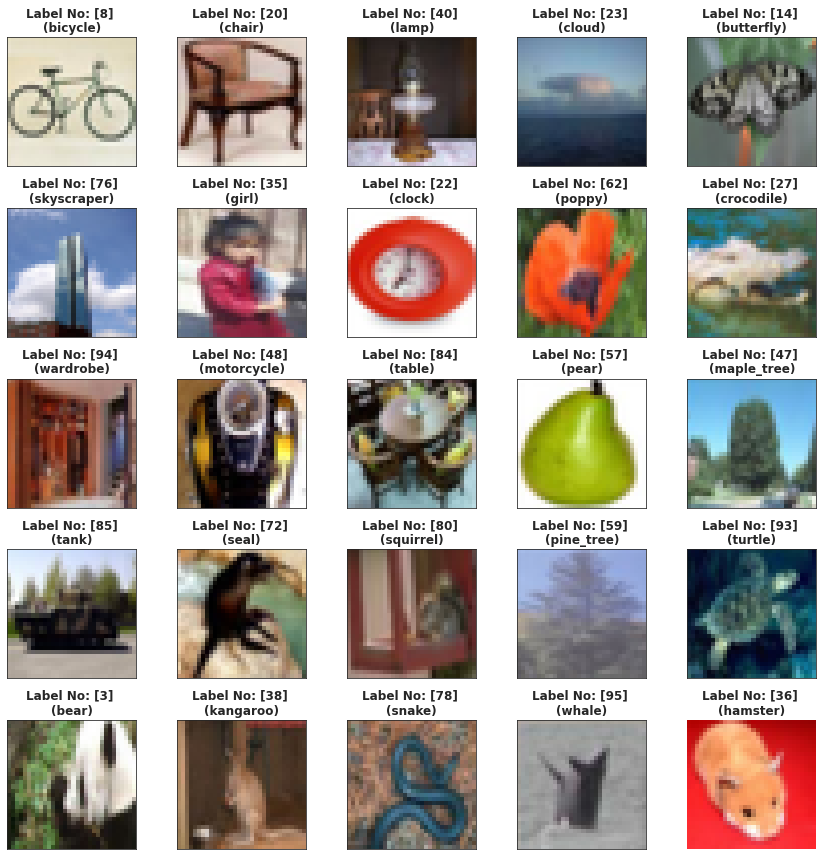

In [6]:
%matplotlib inline
# As an example, 25 random images are shown below
sns.set_style(style="white")
plt.figure(figsize=(12,12))
for num, img in enumerate(np.random.randint(0, X_train.shape[0], 25), start=1):
    plt.subplot(5, 5, num)
    plt.imshow(X_train[img])
    plt.title(f"Label No: {y_train[img]} \n({label_dict[y_train[img][0]]})", 
              weight="bold")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.axis("off")
plt.show()

# 2. Forming Our Neural Network

## 2.1 Preparation

### 2.1.1 Setting The Train & Test Data 

In [7]:
print("--- Shape of the dataset---")
print("X_train:", X_train.shape, "\nX_test :", X_test.shape)
print("y_train:", y_train.shape, "\ny_test :", y_test.shape)

--- Shape of the dataset---
X_train: (50000, 32, 32, 3) 
X_test : (10000, 32, 32, 3)
y_train: (50000, 1) 
y_test : (10000, 1)


In [8]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# y_train = to_categorical(y_train, num_classes=100)
# y_test = to_categorical(y_test, num_classes=100)
# Commented out since "sparse_categorical_crossentropy" loss function is used.

### 2.1.2 TensorBoard Configuration & Evaluation

Here we prepare the TensorBoard configuration to monitor the model's performance below. After creating the model, please refer to TensorBoard API.<br>

To view open TensorBoard instances:
<code>tb_notebook.list()</code>

To control TensorBoard display: <code>tb_notebook.display(port=None, height=1000) </code><br>
If no port is provided, the most recently launched TensorBoard is used.


In [9]:
from keras.callbacks import TensorBoard
from tensorboard import notebook as tb_notebook

In [10]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# To run the TensorBoard, remove the hashtag if exists.
# %tensorboard --logdir my_log_dir

## 2.2 Creating The Model

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(filters=256, 
                        kernel_size=(3, 3), 
                        strides=(1, 1), 
                        padding="valid",
                        activation="relu", 
                        input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, 
                        kernel_size=(3, 3),
                        activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=256, 
                        kernel_size=(2, 2),
                        activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
#model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(100, activation="softmax", name="Output_Layer"))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 15, 15, 256)       1024      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 6, 6, 256)       

## 2.3 Compiling & Fitting

In [70]:
# create a folder for log files
my_log_dir = os.path.join("my_log_dir", 
                          datetime.datetime.now().strftime("%Y-%m-%d_%H.%M.%S"))
tensorboard_callbacks = TensorBoard(log_dir=my_log_dir, histogram_freq=1)

# compile the model
model.compile(optimizer="adam", 
            loss="sparse_categorical_crossentropy", 
            metrics=["accuracy"])
# fit the set
model_history = model.fit(X_train, y_train, 
                batch_size=128, 
                epochs=25, 
                verbose=0, 
                validation_split=0.3, 
                shuffle=False, 
                use_multiprocessing=True, 
                callbacks=[tensorboard_callbacks])

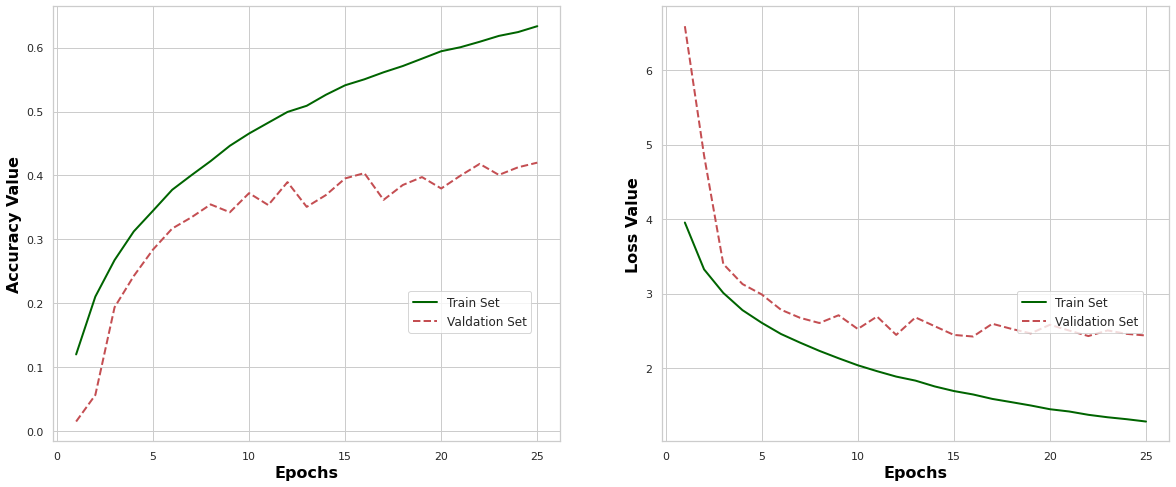

In [71]:
# cosmetic configuration
sns.set(style="whitegrid")
title_font = {"family":"sans", 
              "color":"darkred", 
              "size":30, 
              "weight":"bold", 
              "alpha":0.9}
axis_font = {"family":"sans-serif", 
              "color":"black", 
              "size":16, 
              "weight":"bold"}

# plot the graphs
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(range(1, len(model_history.history["accuracy"])+1), 
         model_history.history["accuracy"], 
         color="darkgreen", linewidth=2, label="Train Set")
plt.plot(range(1, len(model_history.history["val_accuracy"])+1), 
         model_history.history["val_accuracy"], 
        "r--", linewidth=2, label="Valdation Set")
plt.xlabel("Epochs", fontdict=axis_font)
plt.ylabel("Accuracy Value", fontdict=axis_font)
plt.legend(fontsize="medium", loc=(0.7,0.25))

plt.subplot(1,2,2)
plt.plot(range(1, len(model_history.history["loss"])+1), 
         model_history.history["loss"], 
         color="darkgreen", linewidth=2, label="Train Set")
plt.plot(range(1, len(model_history.history["val_loss"])+1), 
         model_history.history["val_loss"], 
        "r--", linewidth=2, label="Validation Set")
plt.xlabel("Epochs", fontdict=axis_font)
plt.ylabel("Loss Value", fontdict=axis_font)
plt.legend(fontsize="medium", loc=(0.7,0.25))

plt.show()

## 2.4 Evaluation

In [72]:
test_scores = model.evaluate(X_test, y_test)
print("Loss value of the test set: {:.2f}".format(test_scores[0]))
print("Accuracy of the test set: {:.2f}%".format(test_scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.4067 - accuracy: 0.4280
Loss value of the test set: 2.41
Accuracy of the test set: 42.80%
